# reproduction of AltumAge and Horvath's model and evaluation metrics

In [2]:
import pandas as pd
import numpy as np
import gc
import pyaging as pya
import matplotlib.pyplot as plt
import seaborn as sns
import random
from IPython.display import clear_output

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from scipy.stats import pearsonr


In [3]:
geo_data_27k = [
    'GSE27317',
    'GSE41037',
    'GSE38873',
    'GSE15745',
    'GSE32393',
    'GSE25892',
    'GSE20242',
    'GSE22595',
    'GSE37988',
    'GSE17448',
    'GSE36642',
    'GSE26126',
    'GSE34035',
    'GSE28746',
    'GSE20236',
    'GSE19711',
    'GSE37008',
    'GSE36812',
    'GSE34257',
    'GSE38608',
    'GSE38291',
    'GSE36166',
    'GSE63384',
    'GSE59274',
    'GSE57285',
    'GSE56606',
    'GSE49908',
    'GSE49907',
    'GSE49905',
    'GSE49904'
]

geo_data_450k = [
    'GSE90124',
    'GSE115797',
    'GSE99624',
    'GSE108213',
    'GSE92767',
    'GSE69176',
    'GSE40360',
    'GSE59157',
    'GSE42861',
    'GSE77241',
    'GSE148000'
]

array_express_27k = [
    'E-GEOD-43256',
    'E-GEOD-64940',
    'E-MTAB-2344',
    'E-GEOD-62867',
    'E-GEOD-44763',
    'E-GEOD-48988',
    'E-GEOD-58119',
    'E-GEOD-58045',
    'E-GEOD-57484',
    'E-GEOD-54211',
    'E-GEOD-56342',
    'E-GEOD-27044',
    'E-GEOD-36194',
    'E-GEOD-21232',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-30758',
    'E-GEOD-32396',
    'E-GEOD-31979',
    'E-MTAB-625',
    'E-MTAB-487'
]

array_express_450k = [
    'E-MTAB-2372',
    'E-GEOD-73832',
    'E-GEOD-71678',
    'E-GEOD-71245',
    'E-GEOD-83334',
    'E-GEOD-75248',
    'E-GEOD-77955',
    'E-GEOD-67705',
    'E-GEOD-77445',
    'E-GEOD-79056',
    'E-GEOD-72556',
    'E-GEOD-52068',
    'E-GEOD-74738',
    'E-GEOD-76105',
    'E-GEOD-65638',
    'E-GEOD-71955',
    'E-GEOD-63106',
    'E-GEOD-73377',
    'E-GEOD-56515',
    'E-GEOD-73103',
    'E-GEOD-67024',
    'E-GEOD-72338',
    'E-GEOD-59457',
    'E-GEOD-64511',
    'E-GEOD-64495',
    'E-GEOD-59509',
    'E-GEOD-67444',
    'E-GEOD-62219',
    'E-GEOD-51954',
    'E-GEOD-52588',
    'E-GEOD-36054',
    'E-GEOD-50660',
    'E-GEOD-61259',
    'E-GEOD-61258',
    'E-GEOD-61257',
    'E-GEOD-61454',
    'E-GEOD-61380',
    'E-GEOD-61107',
    'E-GEOD-54690',
    'E-GEOD-49149',
    'E-GEOD-55438',
    'E-GEOD-53740',
    'E-GEOD-57767',
    'E-GEOD-49064',
    'E-GEOD-50759',
    'E-GEOD-56553',
    'E-GEOD-54399',
    'E-GEOD-53162',
    'E-GEOD-53128',
    'E-GEOD-50498',
    'E-GEOD-47513',
    'E-GEOD-49393',
    'E-GEOD-39004',
    'E-GEOD-51388',
    'E-GEOD-51032',
    'E-GEOD-48325',
    'E-GEOD-44712',
    'E-GEOD-45461',
    'E-GEOD-40279',
    'E-GEOD-41169',
    'E-GEOD-32149',
    'E-GEOD-41826',
    'E-GEOD-42700',
    'E-GEOD-32146',
    'E-GEOD-30870',
    'E-GEOD-34639',
    'E-GEOD-63347',
    'E-GEOD-59592'
]

tcga_all = [
    'TGCA_LUSC',
    'TGCA_THCA',
    'TGCA_HNSC',
    'TGCA_KIRC',
    'TGCA_KIRP',
    'TGCA_LUAD',
    'TGCA_PRAD',
    'TGCA_STAD',
    'TGCA_COAD',
    'TGCA_LIHC',
    'TGCA_UCEC',
    'TGCA_BRCA'
]

cancer_data = [
    'GSE32393',
    'GSE37988',
    'GSE26126',
    'GSE63384',
    'GSE59157',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-31979',
    'E-GEOD-77955',
    'E-GEOD-52068',
    'E-GEOD-49149',
    'E-GEOD-39004'
]

cancer_comparison = [
    'GSE53051',
]

reliability = [
    'GSE55763',
]

rejuvenation = [
    'GSE142439',
    'GSE116754',
    'GSE65214',
    'GSE44430',
    'GSE45727',
    'GSE30653',
    'GSE37066',
    'GSE30456',
]

senescence_analysis = [
    'GSE91069',
    'GSE100249'
]

data_27k = np.concatenate([np.array(geo_data_27k), np.array(array_express_27k)])
data_450k = np.concatenate([np.array(geo_data_450k), np.array(array_express_450k)])
geo_data = np.concatenate([data_27k, data_450k])
tcga_all = np.array(tcga_all)
all_data = np.concatenate([data_27k, data_450k, tcga_all])

In [5]:
count = 0
for dataset in all_data:
    print(dataset)
    new_df = pd.read_pickle('../data_test/' + dataset + '.pkl')

    if count == 0:
        all_test = new_df
        count += 1
    else:
        all_test = pd.concat([all_test, new_df], join='inner')
        gc.collect()
    clear_output()

In [5]:
print(all_test.columns)
print(all_test.shape)
print(all_test.head())

Index(['dataset', 'tissue_type', 'age', 'gender', 'cg00000292', 'cg00002426',
       'cg00003994', 'cg00005847', 'cg00007981', 'cg00008493',
       ...
       'cg27650175', 'cg27650434', 'cg27652350', 'cg27653134', 'cg27654142',
       'cg27655905', 'cg27657283', 'cg27662379', 'cg27662877', 'cg27665659'],
      dtype='object', length=21372)
(5455, 21372)
            dataset tissue_type  age gender  cg00000292  cg00002426  \
GSM675271  GSE27317  blood cord  0.0      F    0.771771    0.857061   
GSM675363  GSE27317  blood cord  0.0      M    0.832678    0.820987   
GSM675235  GSE27317  blood cord  0.0      F    0.899374    0.806204   
GSM675379  GSE27317  blood cord  0.0      M    0.838992    0.885128   
GSM675347  GSE27317  blood cord  0.0      M    0.838790    0.873276   

           cg00003994  cg00005847  cg00007981  cg00008493  ...  cg27650175  \
GSM675271    0.042761    0.181978    0.133760    0.983116  ...    0.009858   
GSM675363    0.103404    0.163862    0.069329    0.975457  .

In [6]:
real_age = all_test.age
print(real_age.shape)
print(real_age.head())

(5455,)
GSM675271    0.0
GSM675363    0.0
GSM675235    0.0
GSM675379    0.0
GSM675347    0.0
Name: age, dtype: object


## Table 1 reproduction for Horvath and AltumAge

In [9]:
def evaluate_age_prediction(y_true, y_pred, model_name="Model", cpg_count=None):
    """
    Evaluates prediction metrics for age estimation models.

    Parameters:
    - y_true (array-like): Ground truth ages.
    - y_pred (array-like): Predicted ages.
    - model_name (str): Name of the model being evaluated.
    - cpg_count (int): Number of CpGs used in the model.

    Returns:
    - pd.DataFrame: Metrics including MAE, MSE, MAD, Pearson R, and Median Error.
    """

    y_true = np.array(y_true).astype(float)
    y_pred = np.array(y_pred).astype(float)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mad = median_absolute_error(y_true, y_pred)
    r, _ = pearsonr(y_true, y_pred)
    median_error = np.median(y_true - y_pred)

    results_df = pd.DataFrame({
        'Model': [model_name],
        'CpGs': [cpg_count],
        'MAD': [mad],
        'MAE': [mae],
        'MSE': [mse],
        'Pearson R': [r],
        'Median Error': [median_error]
    })

    return results_df


In [11]:
adata = pya.pp.df_to_adata(all_test, metadata_cols=['gender', 'tissue_type', 'age', 'dataset'], imputer_strategy='knn')

|-----> 🏗️ Starting df_to_adata function
|-----> ⚙️ Create anndata object started
|-----> ✅ Create anndata object finished [0.1068s]
|-----> ⚙️ Add metadata to anndata started
|-----------> Adding provided metadata to adata.obs
|-----> ✅ Add metadata to anndata finished [0.0030s]
|-----> ⚙️ Log data statistics started
|-----------> There are 5455 observations
|-----------> There are 21368 features
|-----------> Total missing values: 0
|-----------> Percentage of missing values: 0.00%
|-----> ✅ Log data statistics finished [0.1527s]
|-----> ⚙️ Impute missing values started
|-----------> No missing values found. No imputation necessary
|-----> ✅ Impute missing values finished [0.1392s]
|-----> 🎉 Done! [0.6464s]


In [10]:
adata

NameError: name 'adata' is not defined

In [12]:
logger = pya.logger.Logger('test_logger')
device = 'cpu'
dir = '../pyaging_data'
indent_level = 1
AltumClock = pya.pred.load_clock('AltumAge', device, dir, logger, indent_level=indent_level)
HorvathClock = pya.pred.load_clock('Horvath2013', device, dir, logger, indent_level=indent_level)

|-----> ⚙️ Load clock started
|-----------> Data found in ../pyaging_data\altumage.pt
|-----> ✅ Load clock finished [0.0610s]
|-----> ⚙️ Load clock started
|-----------> Data found in ../pyaging_data\horvath2013.pt
|-----> ✅ Load clock finished [0.0151s]


In [13]:
pya.pred.predict_age(adata, ['Horvath2013', 'AltumAge'])

|-----> 🏗️ Starting predict_age function
|-----> ⚙️ Set PyTorch device started
|-----------> Using device: cpu
|-----> ✅ Set PyTorch device finished [0.0010s]
|-----> 🕒 Processing clock: horvath2013
|-----------> ⚙️ Load clock started
|-----------------> Downloading data to pyaging_data\horvath2013.pt
|-----------------> in progress: 100.0000%
|-----------> ✅ Load clock finished [0.4309s]
|-----------> ⚙️ Check features in adata started
|-----------------> All features are present in adata.var_names.
|-----------> ✅ Check features in adata finished [0.0140s]
|-----------> ⚙️ Predict ages with model started
|-----------------> There is no preprocessing necessary
|-----------------> The postprocessing method is anti_log_linear
|-----------------> in progress: 100.0000%
|-----------> ✅ Predict ages with model finished [0.0535s]
|-----------> ⚙️ Add predicted ages and clock metadata to adata started
|-----------> ✅ Add predicted ages and clock metadata to adata finished [0.0010s]
|-----> 🕒

In [14]:
true_age = adata.obs['age']
horvath_pred = adata.obs['horvath2013']
altumage_pred = adata.obs['altumage']

results_horvath = evaluate_age_prediction(true_age, horvath_pred, model_name="Horvath2013", cpg_count=len(HorvathClock.features))
results_altumage = evaluate_age_prediction(true_age, altumage_pred, model_name="AltumAge", cpg_count=len(AltumClock.features))

combined_results = pd.concat([results_altumage, results_horvath], ignore_index=True)

print(combined_results)


         Model   CpGs       MAD       MAE        MSE  Pearson R  Median Error
0     AltumAge  20318  2.147066  3.403840  29.076969   0.980299      0.197092
1  Horvath2013    353  3.530412  5.494661  71.030752   0.951737     -0.128410


In [17]:
# Step 1: Evaluate each model
results = []

results.append(results_horvath)
results.append(results_altumage)

# Step 2: Combine into one DataFrame
all_results = pd.concat(results, ignore_index=True)

# Step 3: Bold best scores
def bold_best(s, maximize=False):
    if maximize:
        is_best = s == s.max()
    else:
        is_best = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_best]

styled_table = (
    all_results.style
    .apply(bold_best, subset=['MAD'], maximize=False)
    .apply(bold_best, subset=['MAE'], maximize=False)
    .apply(bold_best, subset=['MSE'], maximize=False)
    .apply(bold_best, subset=['Pearson R'], maximize=True)
    .apply(bold_best, subset=['Median Error'], maximize=False)
)

styled_table


,Model,CpGs,MAD,MAE,MSE,Pearson R,Median Error
0,Horvath2013,353,3.530412,5.494661,71.030752,0.951737,-0.128410
1,AltumAge,20318,2.147066,3.403840,29.076969,0.980299,0.197092


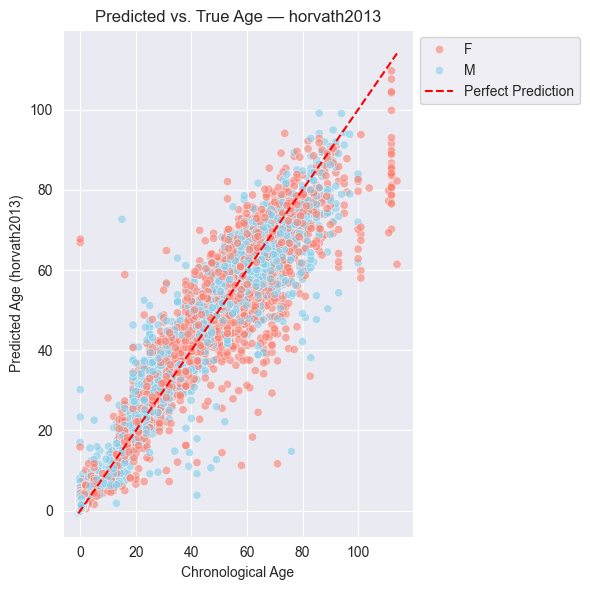

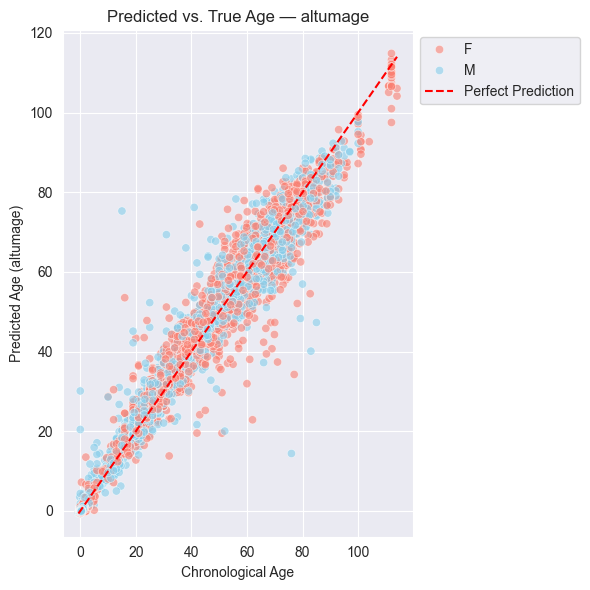

In [22]:
models = ['horvath2013', 'altumage']
gender_palette = {'F': 'salmon', 'M': 'skyblue'}

for model in models:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        x=adata.obs['age'],
        y=adata.obs[model],
        hue=adata.obs['gender'],
        palette=gender_palette,
        alpha=0.6
    )
    # Plot the diagonal reference line
    plt.plot(
        [adata.obs['age'].min(), adata.obs['age'].max()],
        [adata.obs['age'].min(), adata.obs['age'].max()],
        linestyle='--', color='red', label='Perfect Prediction'
    )
    plt.xlabel("Chronological Age")
    plt.ylabel(f"Predicted Age ({model})")
    plt.title(f"Predicted vs. True Age — {model}")

    # Move legend outside the figure and make it smaller
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()


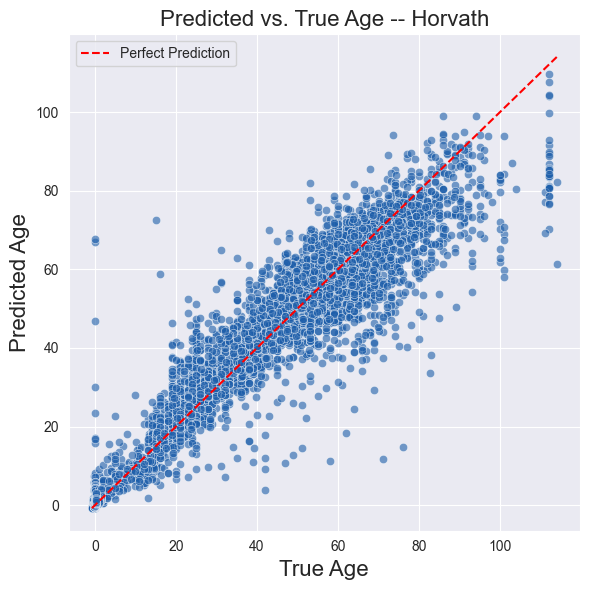

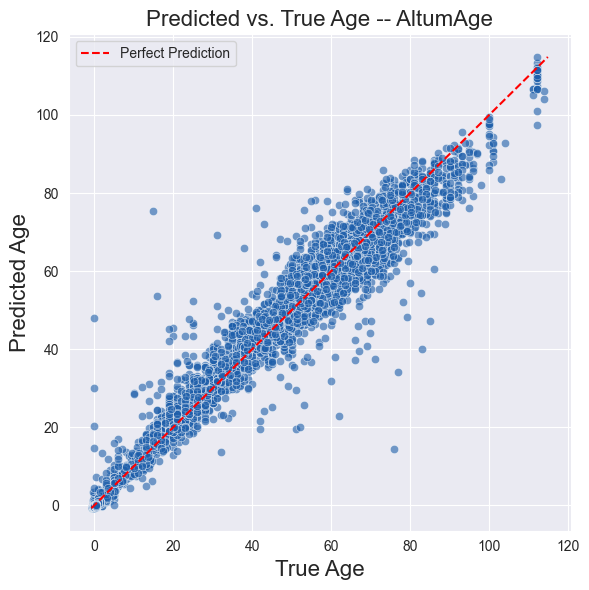

In [20]:
import importlib
from utils import visualization

importlib.reload(visualization)
from utils.visualization import plot_predicted_vs_true

plot_predicted_vs_true(true_age, horvath_pred, (29/255, 94/255, 170/255), "Horvath")
plot_predicted_vs_true(true_age, altumage_pred, (29/255, 94/255, 170/255), "AltumAge")

## LOOCV (table 2, figure 2) reproduction

In [23]:
#load all train data for model training
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_train = pd.read_pickle('./data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_train/' + dataset + '.pkl')
        all_train = pd.concat([all_train, new_df], join ='inner')
        gc.collect()
    clear_output()

In [24]:
multi_platform_cpgs = np.array(pd.read_pickle('../dependencies/multi_platform_cpgs.pkl'))

In [25]:
train_ages = all_train['age'].astype('float64')
test_ages = all_test['age'].astype('float64')

train_info = all_train[['dataset', 'tissue_type', 'age', 'gender']]
print(train_info)
test_info = all_test[['dataset', 'tissue_type', 'age', 'gender']]

train = all_train[multi_platform_cpgs]
test = all_test[multi_platform_cpgs]

# train_1 = train.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)
# print(train_1.shape)
# test_1 = all_test.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)

                dataset tissue_type        age gender
GSM675389      GSE27317  blood cord        0.0      M
GSM675387      GSE27317  blood cord        0.0      M
GSM675357      GSE27317  blood cord        0.0      F
GSM675341      GSE27317  blood cord        0.0      M
GSM675252      GSE27317  blood cord        0.0      M
...                 ...         ...        ...    ...
TCGA-AC-A2FM  TCGA_BRCA      breast  87.077344      F
TCGA-BH-A1F6  TCGA_BRCA      breast  51.173169      F
TCGA-BH-A0AZ  TCGA_BRCA      breast  47.816564      F
TCGA-E9-A1NF  TCGA_BRCA      breast  60.180698      F
TCGA-BH-A0DP  TCGA_BRCA      breast   60.77755      F

[8050 rows x 4 columns]


In [26]:
train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

In [27]:
#dataframe to store all loocv results
loocv_nn = pd.DataFrame(columns = ['dataset', 'tissue_type', 'age', 'gender', 'pred_age'])
loocv_elastic_net = pd.DataFrame(columns = ['dataset', 'tissue_type', 'age', 'gender', 'pred_age'])

In [28]:
def transform_age(age):
    return np.log(age + 1)

def anti_transform_age(transformed_age):
    return np.exp(transformed_age) - 1

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import  ActivityRegularization, GaussianDropout, Input, Dense, Activation, BatchNormalization
from sklearn.model_selection import KFold

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_imp = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

# Loop to fit neural network in all training datasets but one, perform predictions, and store results
initializer = tf.keras.initializers.LecunNormal(seed=1)
count = 0
for dataset in np.unique(train_info[['dataset']])[count:]:

    random.seed(1)
    tf.random.set_seed(1)
    np.random.seed(1)

    gc.collect()
    clear_output()
    print(str(count) + ': ' + dataset)

    # Create training and validation datasets for LOOCV
    new_train = train[train_info.dataset != dataset]
    validation = test[test_info.dataset == dataset]

    # Scaling the data for the NN
    scaler = preprocessing.RobustScaler()
    new_train_scaled = pd.DataFrame(scaler.fit_transform(new_train), index=train.index[train_info.dataset != dataset], columns=multi_platform_cpgs)
    validation_scaled = pd.DataFrame(scaler.transform(validation), index=test.index[test_info.dataset == dataset], columns=multi_platform_cpgs)

    new_train_ages = train_ages[train_info.dataset != dataset]
    val_ages = test_ages[test_info.dataset == dataset]

    new_train_info = train_info[train_info.dataset != dataset]
    validation_info = test_info[test_info.dataset == dataset]

    # Fit Elastic Net model without n_splits
    elastic_net_model = ElasticNet(alpha=0.5, random_state=1)

    # Use KFold to split the data manually for cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=1)  # 10 splits for cross-validation

    validation_info = validation_info.reset_index(drop=True)
    new_train_info = new_train_info.reset_index(drop=True)


    # Manual cross-validation loop for ElasticNet
    for train_index, val_index in kf.split(new_train):
        X_train, X_val = new_train.iloc[train_index], new_train.iloc[val_index]
        y_train, y_val = transform_age(new_train_ages).iloc[train_index], transform_age(new_train_ages).iloc[val_index]

        # Train the ElasticNet model on the current fold
        elastic_net_model.fit(X_train, y_train)

        # Make predictions on the validation fold
        pred_ages_elastic_net = elastic_net_model.predict(X_val)
        pred_ages_elastic_net = anti_transform_age(pred_ages_elastic_net)

        # Store or evaluate the results
        pred_ages_elastic_net = pd.Series(pred_ages_elastic_net, index=X_val.index, name='pred_age')

        # Evaluate and store the results for ElasticNet
        elastic_net_results = pd.concat([validation_info.loc[val_index], pred_ages_elastic_net], axis=1, sort=False, join='inner')
        loocv_elastic_net = pd.concat([loocv_elastic_net, elastic_net_results])

    # Neural Network (NN)
    coeff = 0.05 * np.sqrt(2.0 * np.log(train_imp.shape[1]) / train_imp.shape[0])
    noise = 0.1
    initializer = tf.keras.initializers.LecunNormal(seed=1)
    nn_model = Sequential([
        Input(shape=(20318,), name='feature'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, coeff * 10),
        Dense(32, kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff * 2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff * 2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff * 2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff * 2)),
        Activation('selu'),
        BatchNormalization(),
        Dense(1)
    ])

    # Callbacks for model saving and learning rate reduction
    checkpoint_filepath = '/tmp/checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='loss',
        mode='min',
        save_best_only=True)

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                                                     patience=30, min_lr=0.00001)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    # Compile, train, and evaluate the NN model
    nn_model.compile(optimizer=optimizer,
                     loss='mse',
                     metrics=['mae'])

    history = nn_model.fit({'feature': np.array(new_train_scaled), 'label': np.array(new_train_ages)},
                           batch_size=256,
                           epochs=300,
                           verbose=0,
                           callbacks=[model_checkpoint_callback, reduce_lr])

    # Load the best weights
    nn_model.load_weights(checkpoint_filepath)

    # Using the NN model to predict validation data
    pred_ages_nn = nn_model.predict(validation_scaled).flatten()
    pred_ages_nn = pd.Series(pred_ages_nn, index=validation_index, name='pred_age')

    # Storing NN results
    nn_results = pd.concat([validation_info, pred_ages_nn], axis=1, sort=False, join='inner')
    loocv_nn = pd.concat([loocv_nn, nn_results])

    # Saving results
    loocv_elastic_net.to_pickle('results_loocv/loocv_glmnet.pkl')
    loocv_nn.to_pickle('results_loocv/loocv_nn_revision.pkl')
    print('Done')

    count += 1


0: E-GEOD-21232


KeyError: "None of [Index([  39,   45,   74,   99,  103,  108,  115,  119,  130,  159,\n       ...\n       7933, 7943, 7946, 7962, 7971, 7973, 7993, 8015, 8016, 8026],\n      dtype='int64', length=805)] are in the [index]"